<div style="font-size: 20px; font-weight: bold;">
     Final Phase 3 Project Submission
     <br><br>
     Student name: GEOFFREY MWANGI WACHIRA
     <br><br>
     Student pace: Part-time
     <br><br>
     Instructor name: Winnie Anyoso
</div>

# Business Understanding
In the highly competitive telecom industry, customer churn—where customers discontinue their services—poses a significant challenge, with average churn rates ranging from 30% to 35%. This is especially critical for Syriatel, where customer retention is not only cost-effective but essential for maintaining market position and driving profitability. Given that acquiring a new customer is 5-10 times more expensive than retaining an existing one, reducing churn has become a top priority.

Syriatel is one of the leading telecommunications companies in Syria, offering a wide range of mobile and data services to millions of customers across the country. As a key player in the telecom sector, Syriatel faces significant challenges in retaining customers due to the competitive nature of the industry. Understanding and reducing customer churn is vital for Syriatel to maintain its market position and continue providing high-quality services to its customers.

The objective of this project is to analyze customer behavior to predict and mitigate churn. By identifying high-risk customers through predictive modeling, Syriatel can focus its retention strategies more effectively, thereby enhancing customer loyalty and ensuring long-term business success. The insights gained from this analysis will enable Syriatel to implement targeted interventions that not only reduce churn but also optimize customer engagement, ultimately supporting the company’s growth and profitability goals.


**Stakeholders:**

Syriatel Management: To strategize and implement customer retention programs.

Customer Service Teams: To identify and engage with high-risk customers effectively.

Data Analysts: To continuously monitor and refine the model for better accuracy.

# Data Understanding

The dataset utilized in this project originates from Syriatel, containing detailed information about the company's customers. Each record corresponds to a unique customer, with attributes that provide insights into their interaction with Syriatel's services. These attributes include demographic information, service usage patterns, and customer engagement metrics, all of which are crucial for understanding and predicting customer churn.

**Data Source and Suitability:**
The dataset is well-suited for the objective of predicting customer churn, as it includes both behavioral and service-related features that are likely to influence a customer's decision to terminate their contract. By analyzing these features, the model can identify patterns and correlations that contribute to churn, enabling targeted retention strategies.

**Dataset Size and Descriptive Statistics:**
- The dataset includes 3333 rows and 21 columns, representing a substantial amount of data for robust analysis.
- **Key Features and Descriptive Statistics:**
  - **State:** The state where the customer resides. This categorical variable can help identify geographic patterns in churn.
  - **Account Length:** The number of days the customer has had this account. Longer account durations might correlate with customer loyalty.
  - **Area Code:** The area code associated with the customer's phone number. This categorical variable could influence service usage patterns.
  - **Phone Number:** The customer's phone number. This feature is excluded from the analysis as it is not relevant for predicting churn.
  - **International Plan:** Indicates whether the customer has subscribed to an international calling plan (binary: True/False). This feature might impact customer satisfaction and churn rates.
  - **Voice Mail Plan:** Indicates whether the customer has subscribed to a voicemail plan (binary: True/False). This feature could also influence customer satisfaction and churn.
  - **Number Vmail Messages:** The number of voicemail messages the customer has received. This numerical variable might indicate how much the customer relies on voicemail services.
  - **Total Day Minutes:** The total number of minutes the customer has spent on calls during the day. Higher usage could be an indicator of engagement with the service.
  - **Total Day Calls:** The total number of calls the customer has made during the day. This metric, like total day minutes, provides insight into customer engagement.
  - **Total Day Charge:** The total charges incurred by the customer for daytime calls. This feature is directly related to revenue and could affect satisfaction.
  - **Total Eve Minutes:** The total number of minutes the customer has spent on calls during the evening. Evening usage patterns might differ from daytime patterns and affect churn.
  - **Total Eve Calls:** The total number of calls the customer has made during the evening. Like total eve minutes, this provides additional insight into customer behavior.
  - **Total Eve Charge:** The total charges incurred by the customer for evening calls. This feature, like total day charge, is related to revenue and customer satisfaction.
  - **Total Night Minutes:** The total number of minutes the customer has spent on calls during the night. Nighttime usage might reflect different customer needs or behaviors.
  - **Total Night Calls:** The total number of calls the customer has made during the night. This metric, together with total night minutes, provides a complete picture of the customer’s usage patterns.
  - **Total Night Charge:** The total charges incurred by the customer for nighttime calls. This is another revenue-related feature that could influence satisfaction and churn.
  - **Total Intl Minutes:** The total number of minutes the customer has spent on international calls. This metric could be particularly relevant for customers with an international plan.
  - **Total Intl Calls:** The total number of international calls the customer has made. This could indicate how valuable the international plan is to the customer.
  - **Total Intl Charge:** The total charges incurred by the customer for international calls. This feature might significantly influence churn, especially for international callers.
  - **Customer Service Calls:** The number of times the customer has called customer service. High values might indicate dissatisfaction and be a strong predictor of churn.
  - **Churn:** The target variable, indicating whether the customer has terminated the contract (binary: True/False).

**Feature Relevance:**
Each feature included in the dataset has been selected based on its potential relevance to customer churn. For instance, service usage patterns (e.g., total minutes and charges) and customer service interactions are directly linked to customer satisfaction, which is a strong predictor of churn. The inclusion of these features allows the model to capture a comprehensive view of customer behavior.

**Data Limitations:**
- **Lack of Demographic Data:** While the dataset includes the state and area code, more granular demographic data such as age, income, or occupation could provide deeper insights into churn behavior.
- **Potential Class Imbalance:** The dataset may have an imbalance between the number of churned and non-churned customers, which could impact model performance and necessitate techniques like SMOTE (Synthetic Minority Over-sampling Technique).
- **Temporal Aspects:** The dataset does not include time-based variables that could reveal trends or shifts in customer behavior over time, limiting the ability to detect seasonality or changes in churn patterns.

These limitations, while significant, do not outweigh the strengths of the dataset. The comprehensive nature of the included features still provides a solid foundation for building effective predictive models aimed at reducing customer churn for Syriatel.


## Importing Required Libraries

In [223]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report ,auc
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading the data

In [156]:
# Reading data from csv file and Checking the first 5 rows.
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Data dimensionality

In [157]:
# Check shape of dataframe
df.shape

(3333, 21)

The dataset has 3333 rows and 21 columns

Feature names

In [158]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [159]:
#general information about the dataframe
df.describe() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [160]:
#statistics on non-numerical features
df.describe(include=["object", "bool"])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,378-8572,no,no,False
freq,106,1,3010,2411,2850


Feature types

In [161]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

In this section, we prepare the data for exploratory data analysis (EDA) and modeling. The following checks are performed:

- **Duplicated Rows**: Identifying and removing any duplicate entries.
- **Missing Values**: Detecting and addressing any gaps in the data.
- **Irrelevant Columns**: Removing columns that do not contribute to the analysis.


**Duplicated Rows**

In [162]:
# Check for duplicated rows
df.duplicated().sum()

0

No duplicated rows to deal with.

**Missing Values**

In [163]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values.

**Irrelevant Columns**

Phone number is part of Personally identifiable information (PII) refers to data that can be used to identify, locate, or contact individuals or establishments, or reveal the characteristics or other details about them.Also, it does not necessarily help the analysis so dropping the feature is the best thing.

In [164]:
# Removing Phone number feature 

df.drop(['phone number'],axis=1,inplace=True)


In [165]:
#Confirming the drop

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Explanatory Data Analysis (EDA) 

In [166]:
# Checking the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Feature Types

* This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.  

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* state
* area code
* international plan
* voicemail plan

In [167]:

continuous_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categorical_cols = ['state','area code','international plan','voice mail plan']

### Churn feature distribution

In [168]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [169]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

85.5% of the people did not churn (i.e., their churn value is False).
14.49% of the people did churn (i.e., their churn value is True).

### Churn vs Did not Churn representation

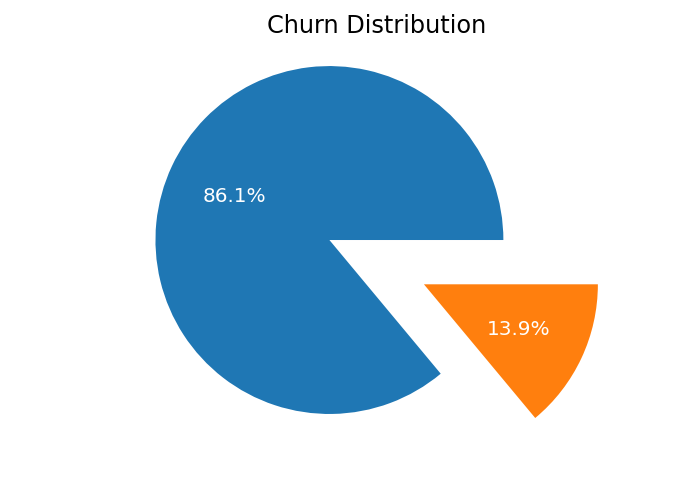

In [170]:
#Churn vs Did not Churn representation
labels = ['Did Not Churn', 'Churned']
sizes = [86.05, 13.95]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode = (0.3, 0.3), textprops={'color': 'white'})
plt.title('Churn Distribution')
plt.show()


### Average details of churned users

In [171]:
#Average details of churned users
churned_users = df[df['churn'] == True]  # Filter for churned users


average_values = churned_users.mean()

# Display the average values
print(average_values)


account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64


### Average Values of Numerical Features for Churned Users

The following table represents the average (mean) values of numerical features for users who have churned:

- **Account Length**: The average length of time that churned users had their accounts is about **102.66** days.
- **Area Code**: The average area code for churned users is **437.82**. (Note: Area codes are categorical, so this value is less meaningful).
- **Number of Voicemail Messages**: On average, churned users had about **5.12** voicemail messages.
- **Total Day Minutes**: Churned users spent an average of **206.91** minutes on daytime calls.
- **Total Day Calls**: The average number of daytime calls made by churned users is **101.34**.
- **Total Day Charge**: Churned users were charged an average of **$35.18** for daytime calls.
- **Total Evening Minutes**: On average, churned users spent **212.41** minutes on evening calls.
- **Total Evening Calls**: The average number of evening calls made by churned users is **100.56**.
- **Total Evening Charge**: Churned users were charged an average of **$18.05** for evening calls.
- **Total Night Minutes**: The average night minutes for churned users is **205.23** minutes.
- **Total Night Calls**: Churned users made an average of **100.40** night calls.
- **Total Night Charge**: Churned users were charged an average of **$9.24** for night calls.
- **Total International Minutes**: Churned users spent an average of **10.70** minutes on international calls.
- **Total International Calls**: The average number of international calls made by churned users is **4.16**.
- **Total International Charge**: Churned users were charged an average of **$2.89** for international calls.
- **Customer Service Calls**: On average, churned users made **2.23** calls to customer service.

This summary provides insight into the usage patterns and characteristics of customers who decided to leave the service.



### **Calculating the total number of calls and charge for all users**

In [172]:
total_calls = (
    df["total day calls"]
    + df["total eve calls"]
    + df["total night calls"]
    + df["total intl calls"]
)


total_charge = (
    df["total day charge"]
    + df["total eve charge"]
    + df["total night charge"]
    + df["total intl charge"]
)


### **Confirming the creation of the total number of calls and charge for all users**

In [173]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [174]:
df.insert(loc=2, column='total_calls', value=total_calls)
df.insert(loc=4, column='total_charge', value=total_charge)

In [175]:
df.head()

,state,account length,total_calls,area code,total_charge,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,303,415,75.56,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,332,415,59.24,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,333,415,62.29,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,255,408,66.80,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,359,415,52.09,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### **Total Calls Distribution by Churn Status**

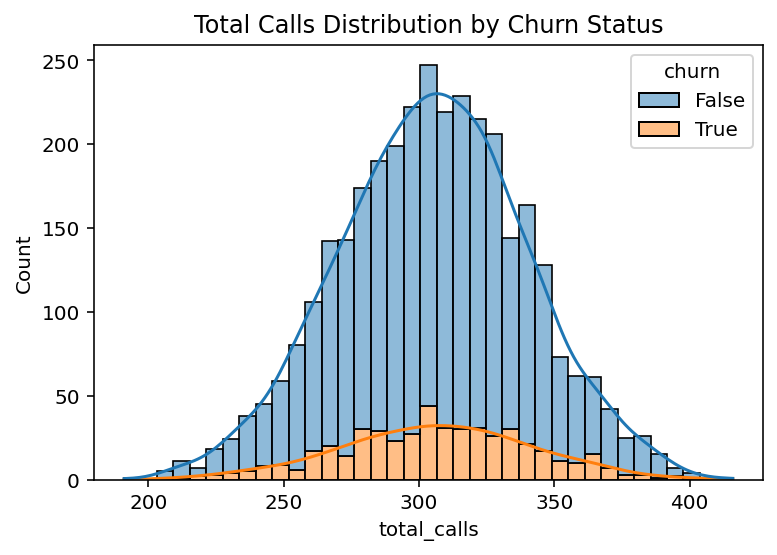

In [176]:
sns.histplot(data=df, x="total_calls", hue="churn", kde=True, multiple="stack")

plt.title('Total Calls Distribution by Churn Status')
plt.show()

#### Conclusion

**Non-Churned Users:**

The distribution of total calls for users who did not churn (churn = False) is symmetric and follows a normal distribution centered around 300 calls.

The spread of calls is quite wide, ranging from about 200 to 400 calls.

**Churned Users:**

For users who churned (churn = True), the distribution is also symmetric but with a lower center around 250 calls.

The distribution is narrower, suggesting that churned users tend to have fewer total calls compared to non-churned users.

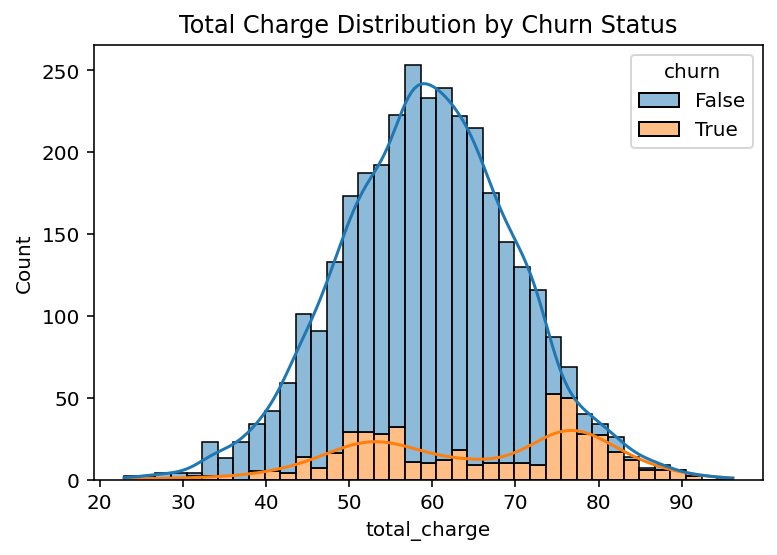

In [177]:
sns.histplot(data=df, x="total_charge", hue="churn", kde=True, multiple="stack")

plt.title('Total Charge Distribution by Churn Status')
plt.show()

### **Total Charge Distribution by Churn Status**

**Non-Churned Users:**

The total charge for users who did not churn follows a fairly normal distribution, centered around 60.

The spread of charges is moderate, ranging from about 30 to 90.

**Churned Users:**

The distribution of total charges for churned users is bimodal, indicating two distinct groups within the churned users.

One group has a lower charge, and another has a higher charge. This suggests variability in the billing amounts among churned users.

#### International plan vs churn

<AxesSubplot:xlabel='international plan', ylabel='count'>

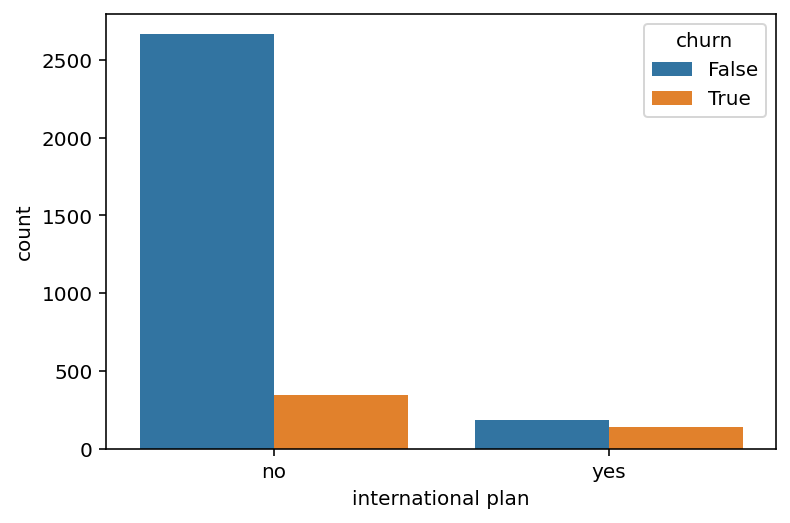

In [178]:
sns.countplot(x="international plan", hue="churn", data=df)

Conclusion :

Customers without an international plan are much more likely to stay (not churn) compared to those with an international plan. Additionally, the proportion of customers who churn is relatively higher among those with an international plan compared to those without one.

#### Churn vs Customer service calls

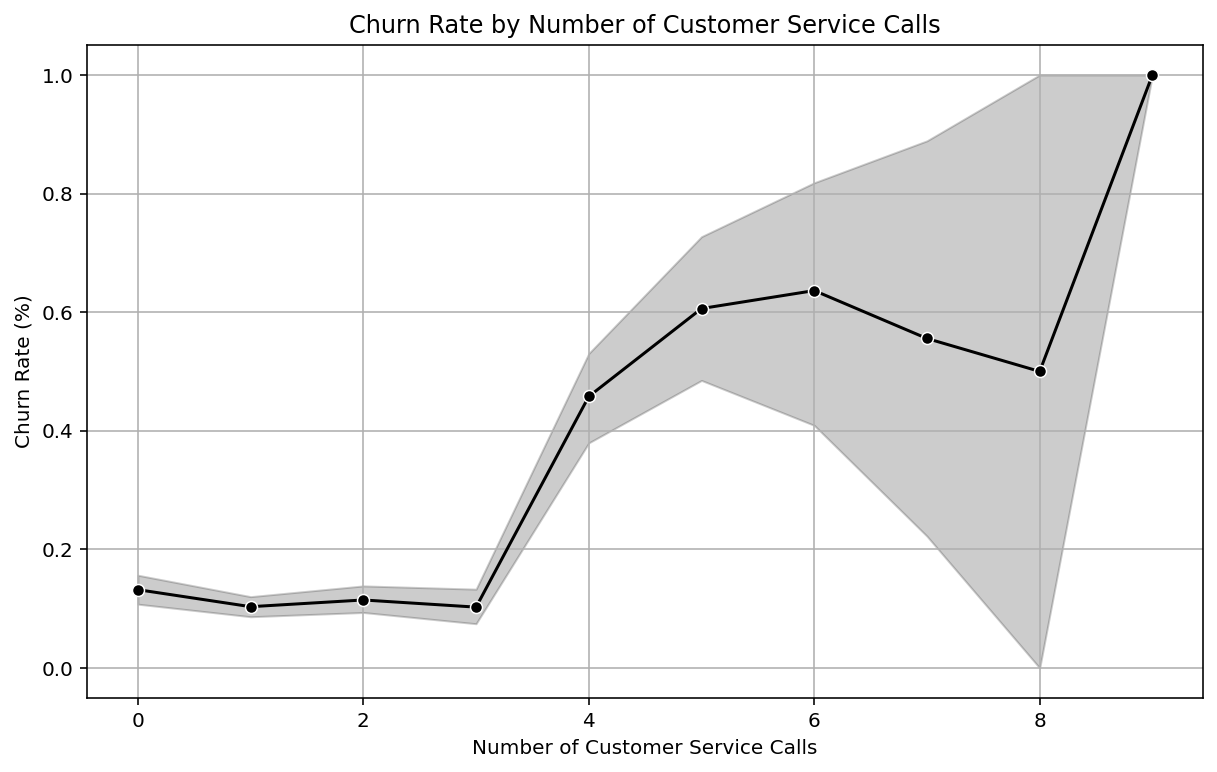

In [179]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['customer service calls'], y=df['churn'], color='black', marker='o')


plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.grid(True)
plt.show()

**Conclusion:**

Low Customer Service Calls (0-3): Customers making fewer customer service calls have a relatively low churn rate, suggesting that they are generally more satisfied or have fewer issues that require frequent support interactions.

Moderate Calls (4-6): A noticeable increase in churn rate occurs when customers make between 4 to 6 calls, indicating potential dissatisfaction or unresolved issues that might lead them to consider leaving.

High Calls (9): A 100% churn rate at 9 calls strongly suggests that customers who need to make many service calls are likely highly dissatisfied, facing significant unresolved issues, or have exhausted all avenues for resolving their concerns through customer service.

# Univariate Analysis

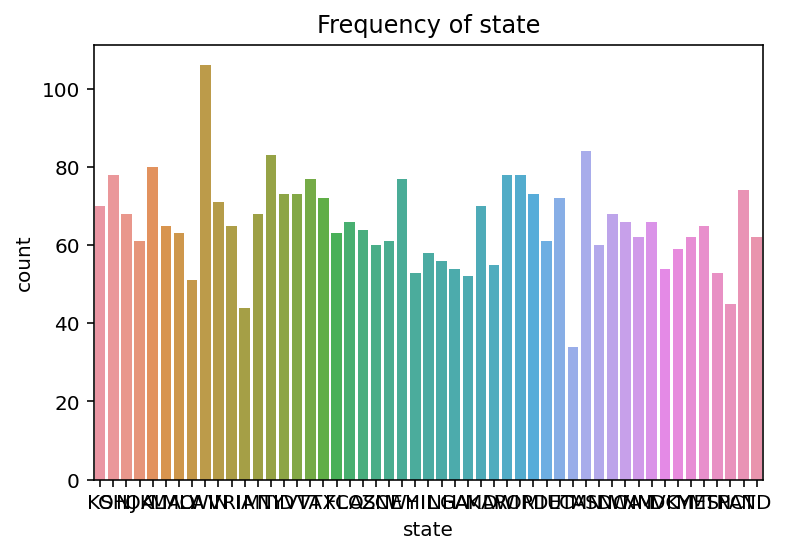

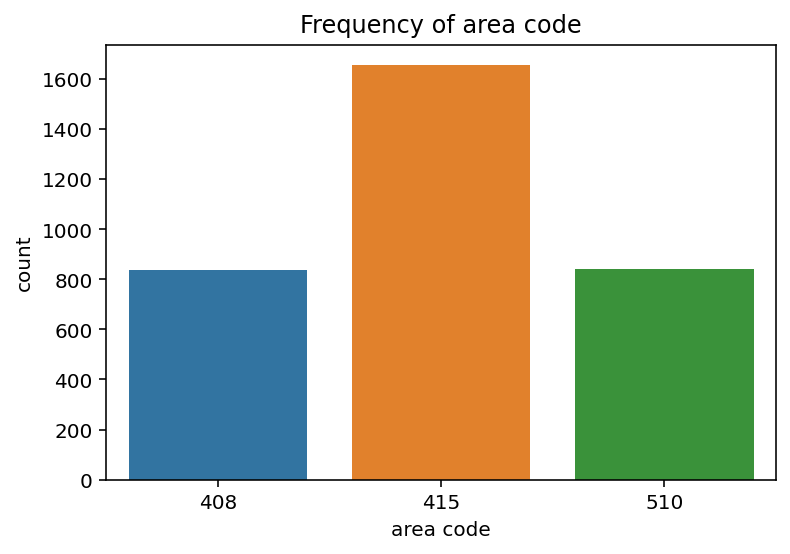

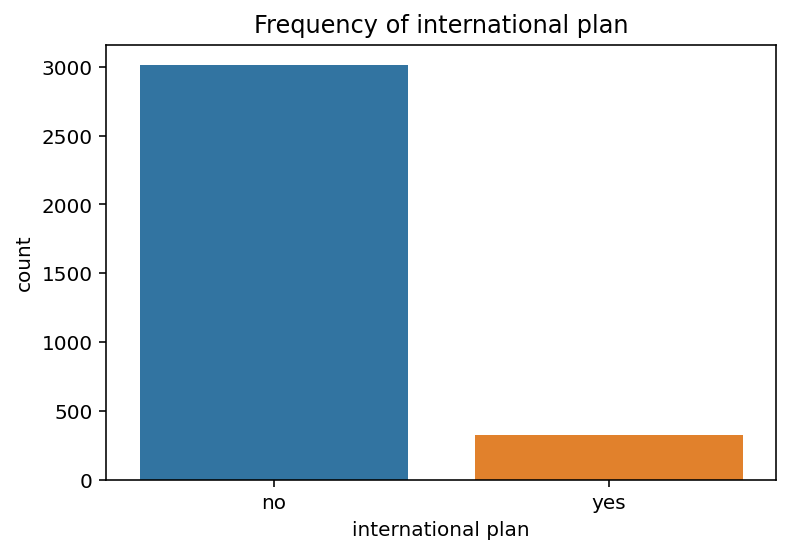

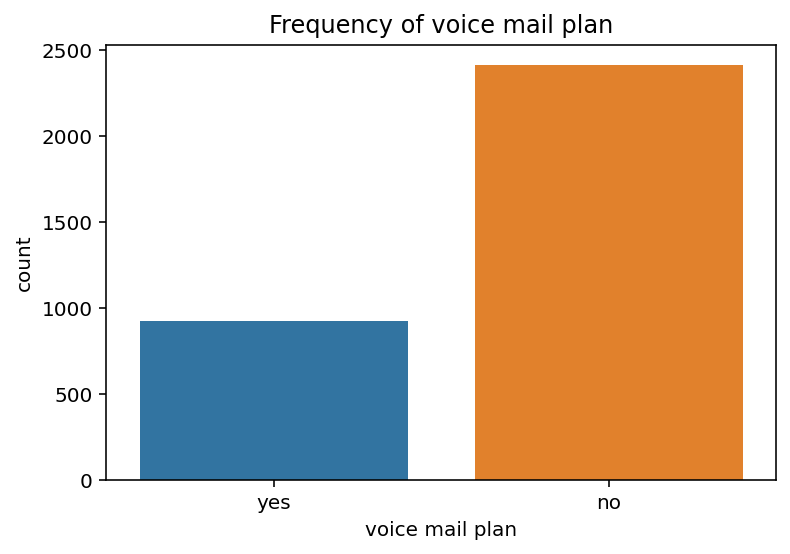

In [181]:
# Univariate Analysis of the Categorical Features
for feature in categorical_cols:
    sns.countplot(data=df, x=feature)
    plt.title(f'Frequency of {feature}')
    plt.show()

**Frequency of Area Code**

The plot shows the distribution of area codes among the customers. The majority of the customers have the area code 415, followed by 408 and 510. This indicates that the service provider may have a stronger presence or customer base in the 415 area compared to the other two area codes.

**Frequency of International Plan**

The plot displays the frequency of customers who have subscribed to the international plan. A significant majority of the customers do not have an international plan, suggesting that either the customers do not frequently make international calls or the plan is not popular among the user base.

**Frequency of Voice Mail Plan**

The plot illustrates the distribution of customers who have subscribed to a voicemail plan. Similar to the international plan, a large majority of customers do not have a voicemail plan. This could indicate that the voicemail plan is not a commonly preferred option among the customers.

### Mean churn rate for each state

In [214]:
#Mean churn rate for each state
state_churn = df.groupby('state')['churn'].mean().reset_index()

# Sorting the states by churn rate in descending order
state_churn = state_churn.sort_values(by='churn', ascending=False)
state_churn

,state,churn
4,CA,0.240000
31,NJ,0.216667
43,TX,0.216667
20,MD,0.210526
16,KS,0.183333
33,NV,0.178571
40,SC,0.177778
19,MA,0.172414
47,WA,0.172414
27,NC,0.150000


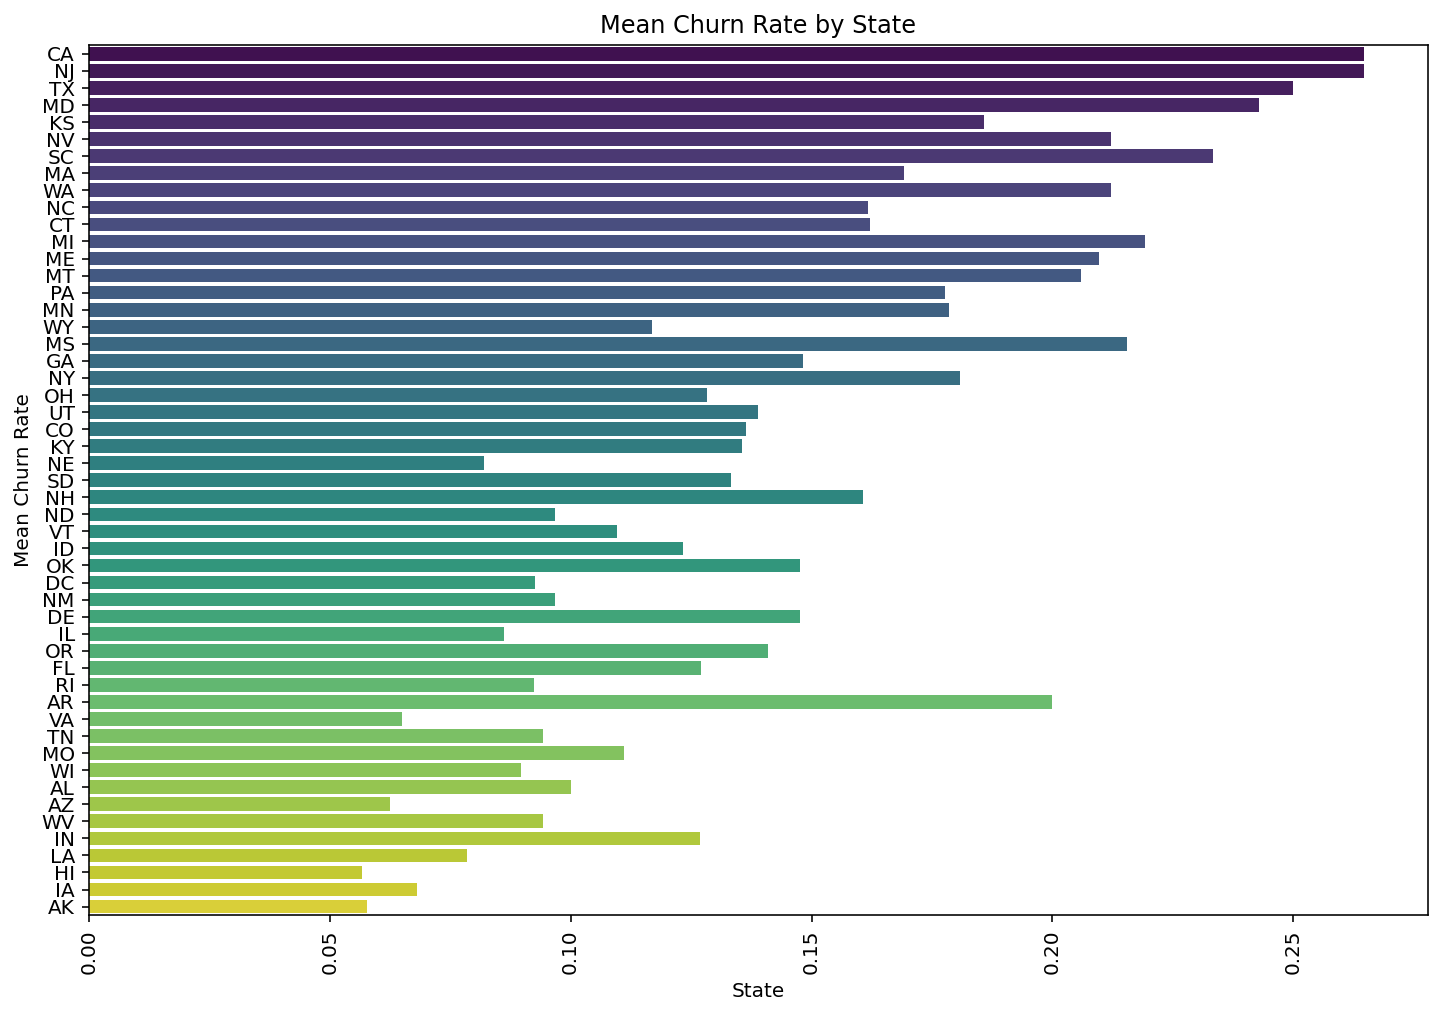

In [213]:
#Mean Churn Rate by State
plt.figure(figsize=(12, 8))
sns.barplot(data=state_churn, x= 'churn', y='state', palette='viridis',order=df.groupby('state')['churn'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Mean Churn Rate')
plt.title('Mean Churn Rate by State')
plt.show()


NJ(0.264706) ,CA(0.264706),TX(0.250000),MD(0.242857) are some of the states with high churn rate and this analysis helps in Identify High-Risk States: States with taller bars have higher churn rates, indicating areas where customer retention might be a bigger issue.

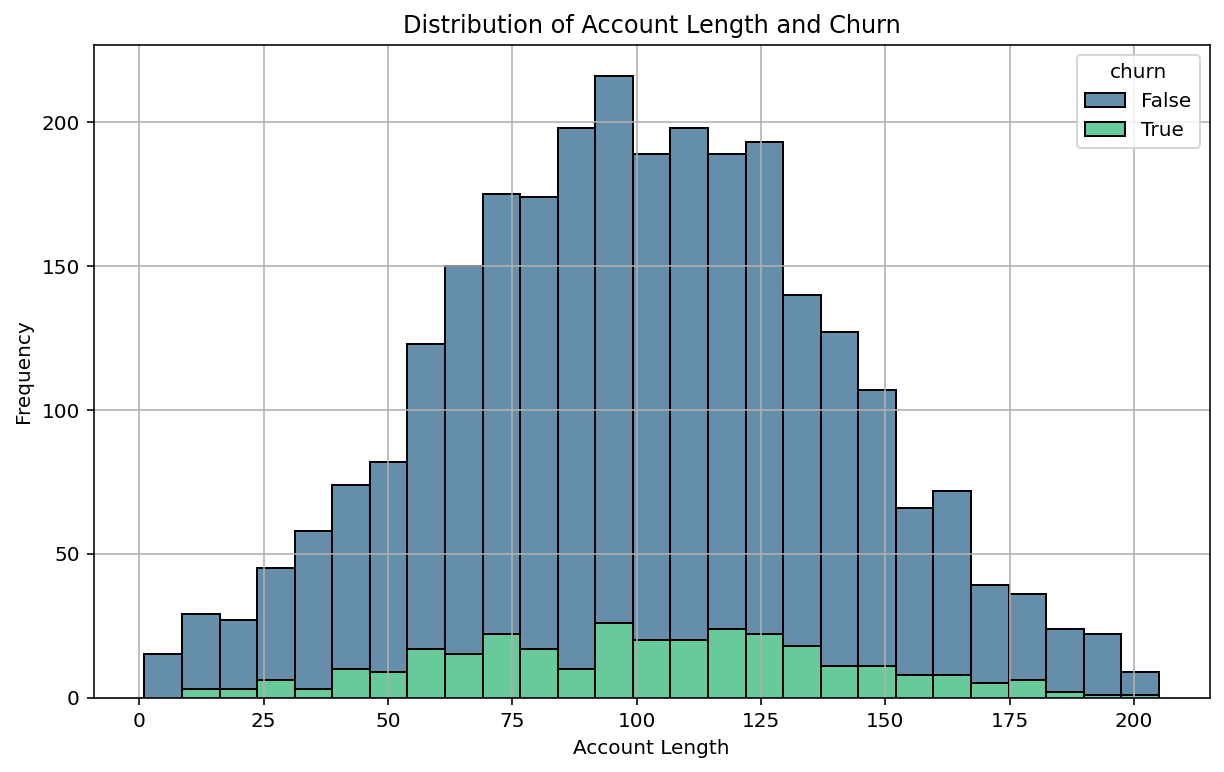

In [215]:
#Distribution of Account Length and Churn
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='account length', hue='churn', multiple='stack', palette='viridis')

plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Account Length and Churn')
plt.grid(True)

plt.show()

The histogram shows that Account Length has a normal distribution, centered around 100 days, but it doesn't strongly differentiate between customers who churn and those who don't. The proportion of churned customers remains relatively consistent across all account lengths, suggesting that Account Length alone is not a significant predictor of churn.

### Features Correlations with Churn

In [216]:
#Correlation with Churn
correlations = df.corr()['churn'].sort_values(ascending=False)

correlation_table = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation with Churn': correlations.values
})

print(correlation_table)

                   Feature  Correlation with Churn
0                    churn                1.000000
1             total_charge                0.327794
2        total day minutes                0.287919
3         total day charge                0.287914
4        total eve minutes                0.131182
5         total eve charge                0.131166
6        total intl charge                0.082370
7       total intl minutes                0.082344
8      total night minutes                0.054316
9       total night charge                0.054304
10         total day calls                0.020456
11       total night calls                0.013984
12             total_calls                0.011041
13          account length                0.008039
14               area code               -0.008755
15         total eve calls               -0.009398
16  customer service calls               -0.013895
17        total intl calls               -0.055215
18   number vmail messages     

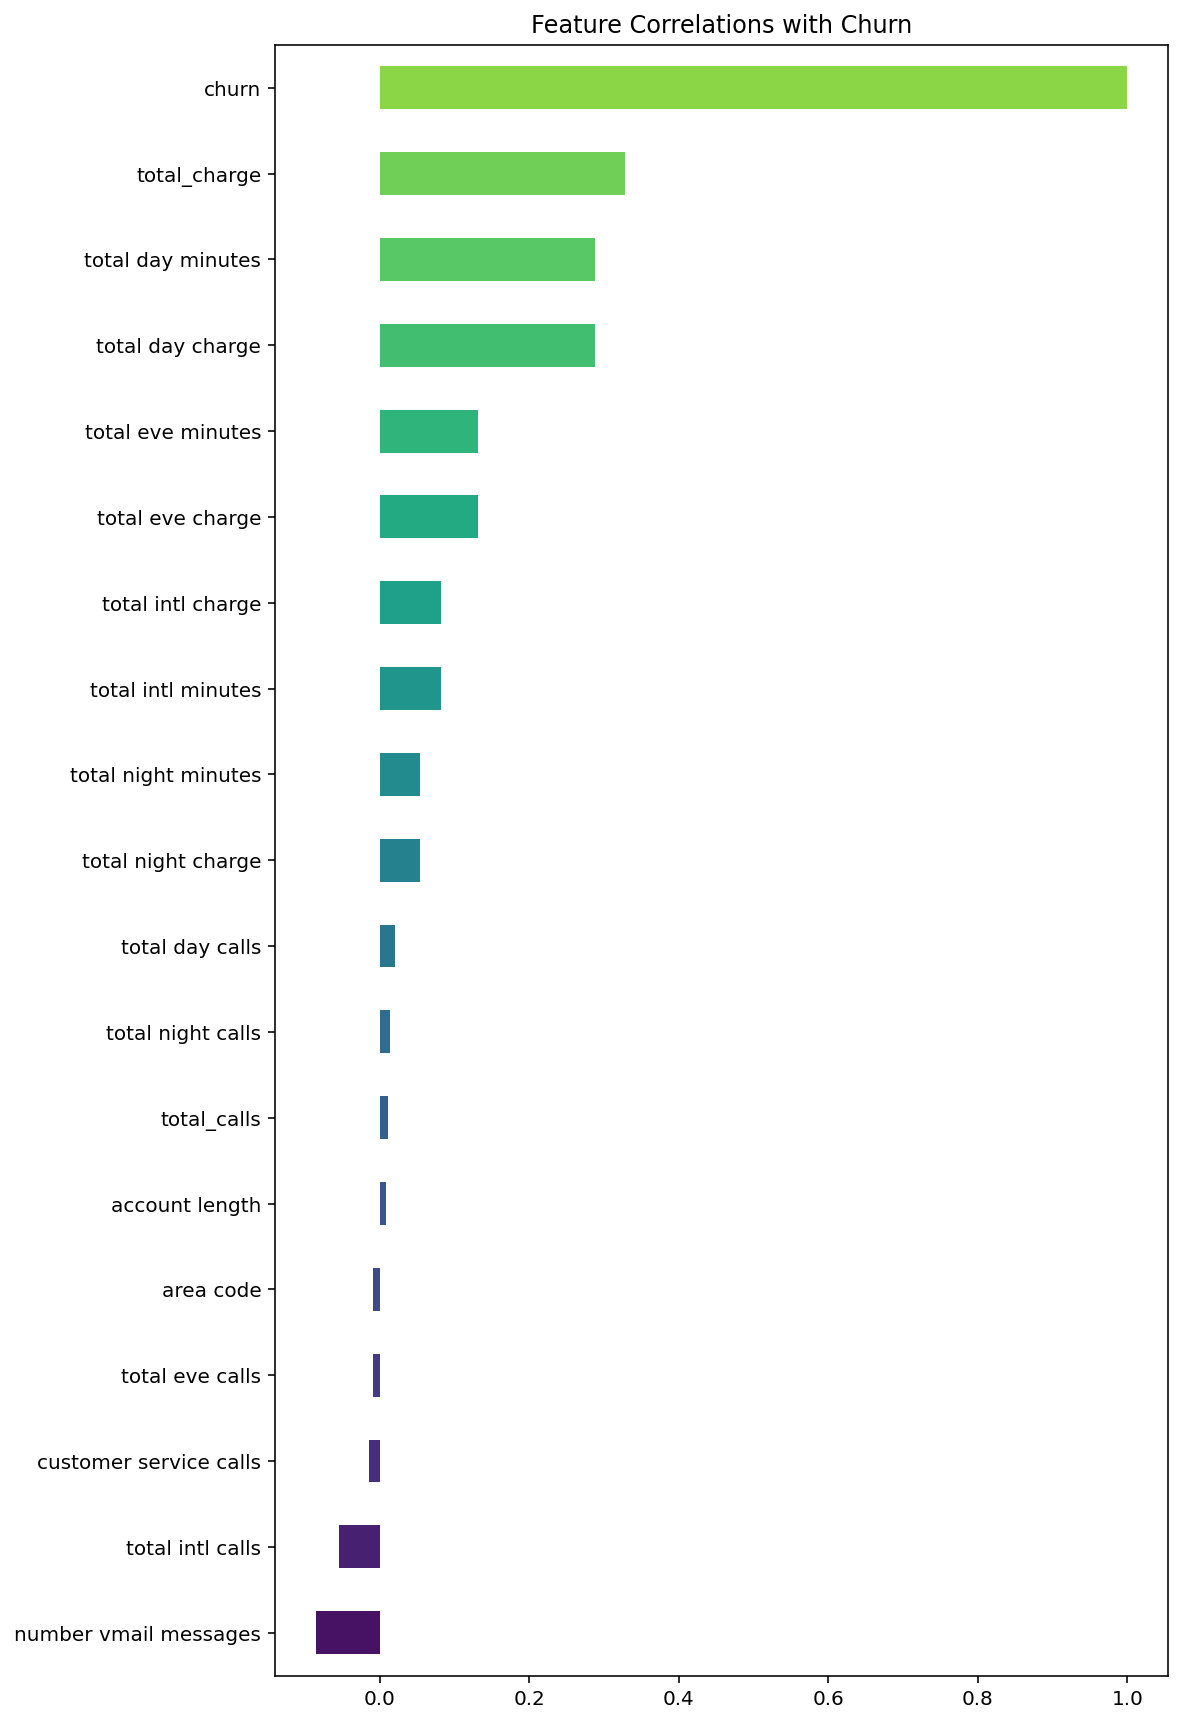

In [217]:
#Feature Correlations with Churn
plt.figure(figsize=(8, 15))
df.corr()['churn'].sort_values().plot(kind='barh', color=sns.color_palette("viridis", len(df.columns)))
plt.title('Feature Correlations with Churn')
plt.show()

### Analysis on 'churn' Feature
* Churn will be used as the dependent variable in this analysis.
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account. 

False    2850
True      483
Name: churn, dtype: int64


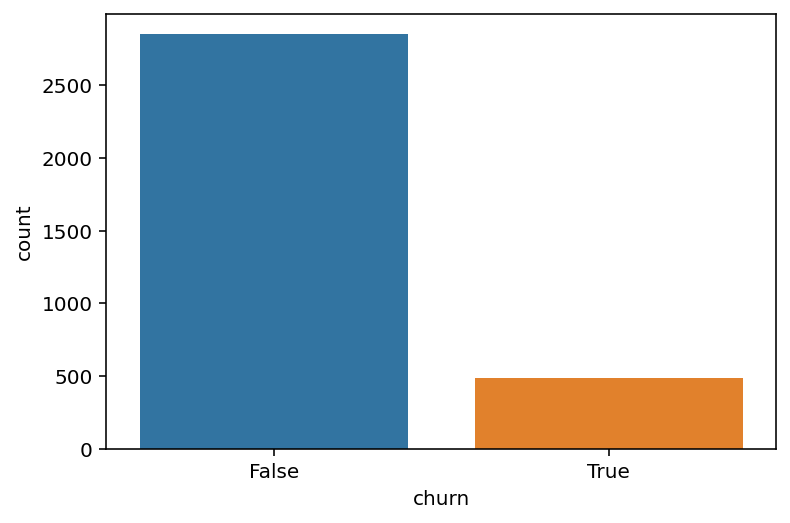

In [187]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost. 
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

### Churn vs area code

In [218]:
#Distribution of Area Code Feature
figure = px.pie(
    df,
    values=df['area code'].value_counts().values,
    names=df['area code'].value_counts().index,
    hole=0.1,  
    title='Distribution of Area Code Feature')
figure.update_traces(pull=[0.1, 0.1, 0.1])
figure.show()


* Half of the customers have the area code 415. 
* One fourth of customers have the area code 510 and another fourth have the area code 408.

Churn rate percentages per area code

In [189]:
#sum of churned customers and total customers per area
churn_sum_by_area = df.groupby('area code')['churn'].sum()
total_customers_by_area = df.groupby('area code')['churn'].count()

# Calculating the percentage of churned customers per area
churn_percentage_by_area = (churn_sum_by_area / total_customers_by_area * 100).reset_index()

# Combining total churned customers with the percentage of churned customers
churn_percentage_by_area['Total Churned Customers'] = churn_sum_by_area.values
churn_percentage_by_area.columns = ['Area Code', 'Total Churned Customers' ,'Churn Rate (%)' ]

# Displaying the churn rate percentages as a table
print(churn_percentage_by_area)

   Area Code  Total Churned Customers  Churn Rate (%)
0        408                14.558473             122
1        415                14.259819             236
2        510                14.880952             125


### Pairplots for Numeric Features in respect to the Churn feature

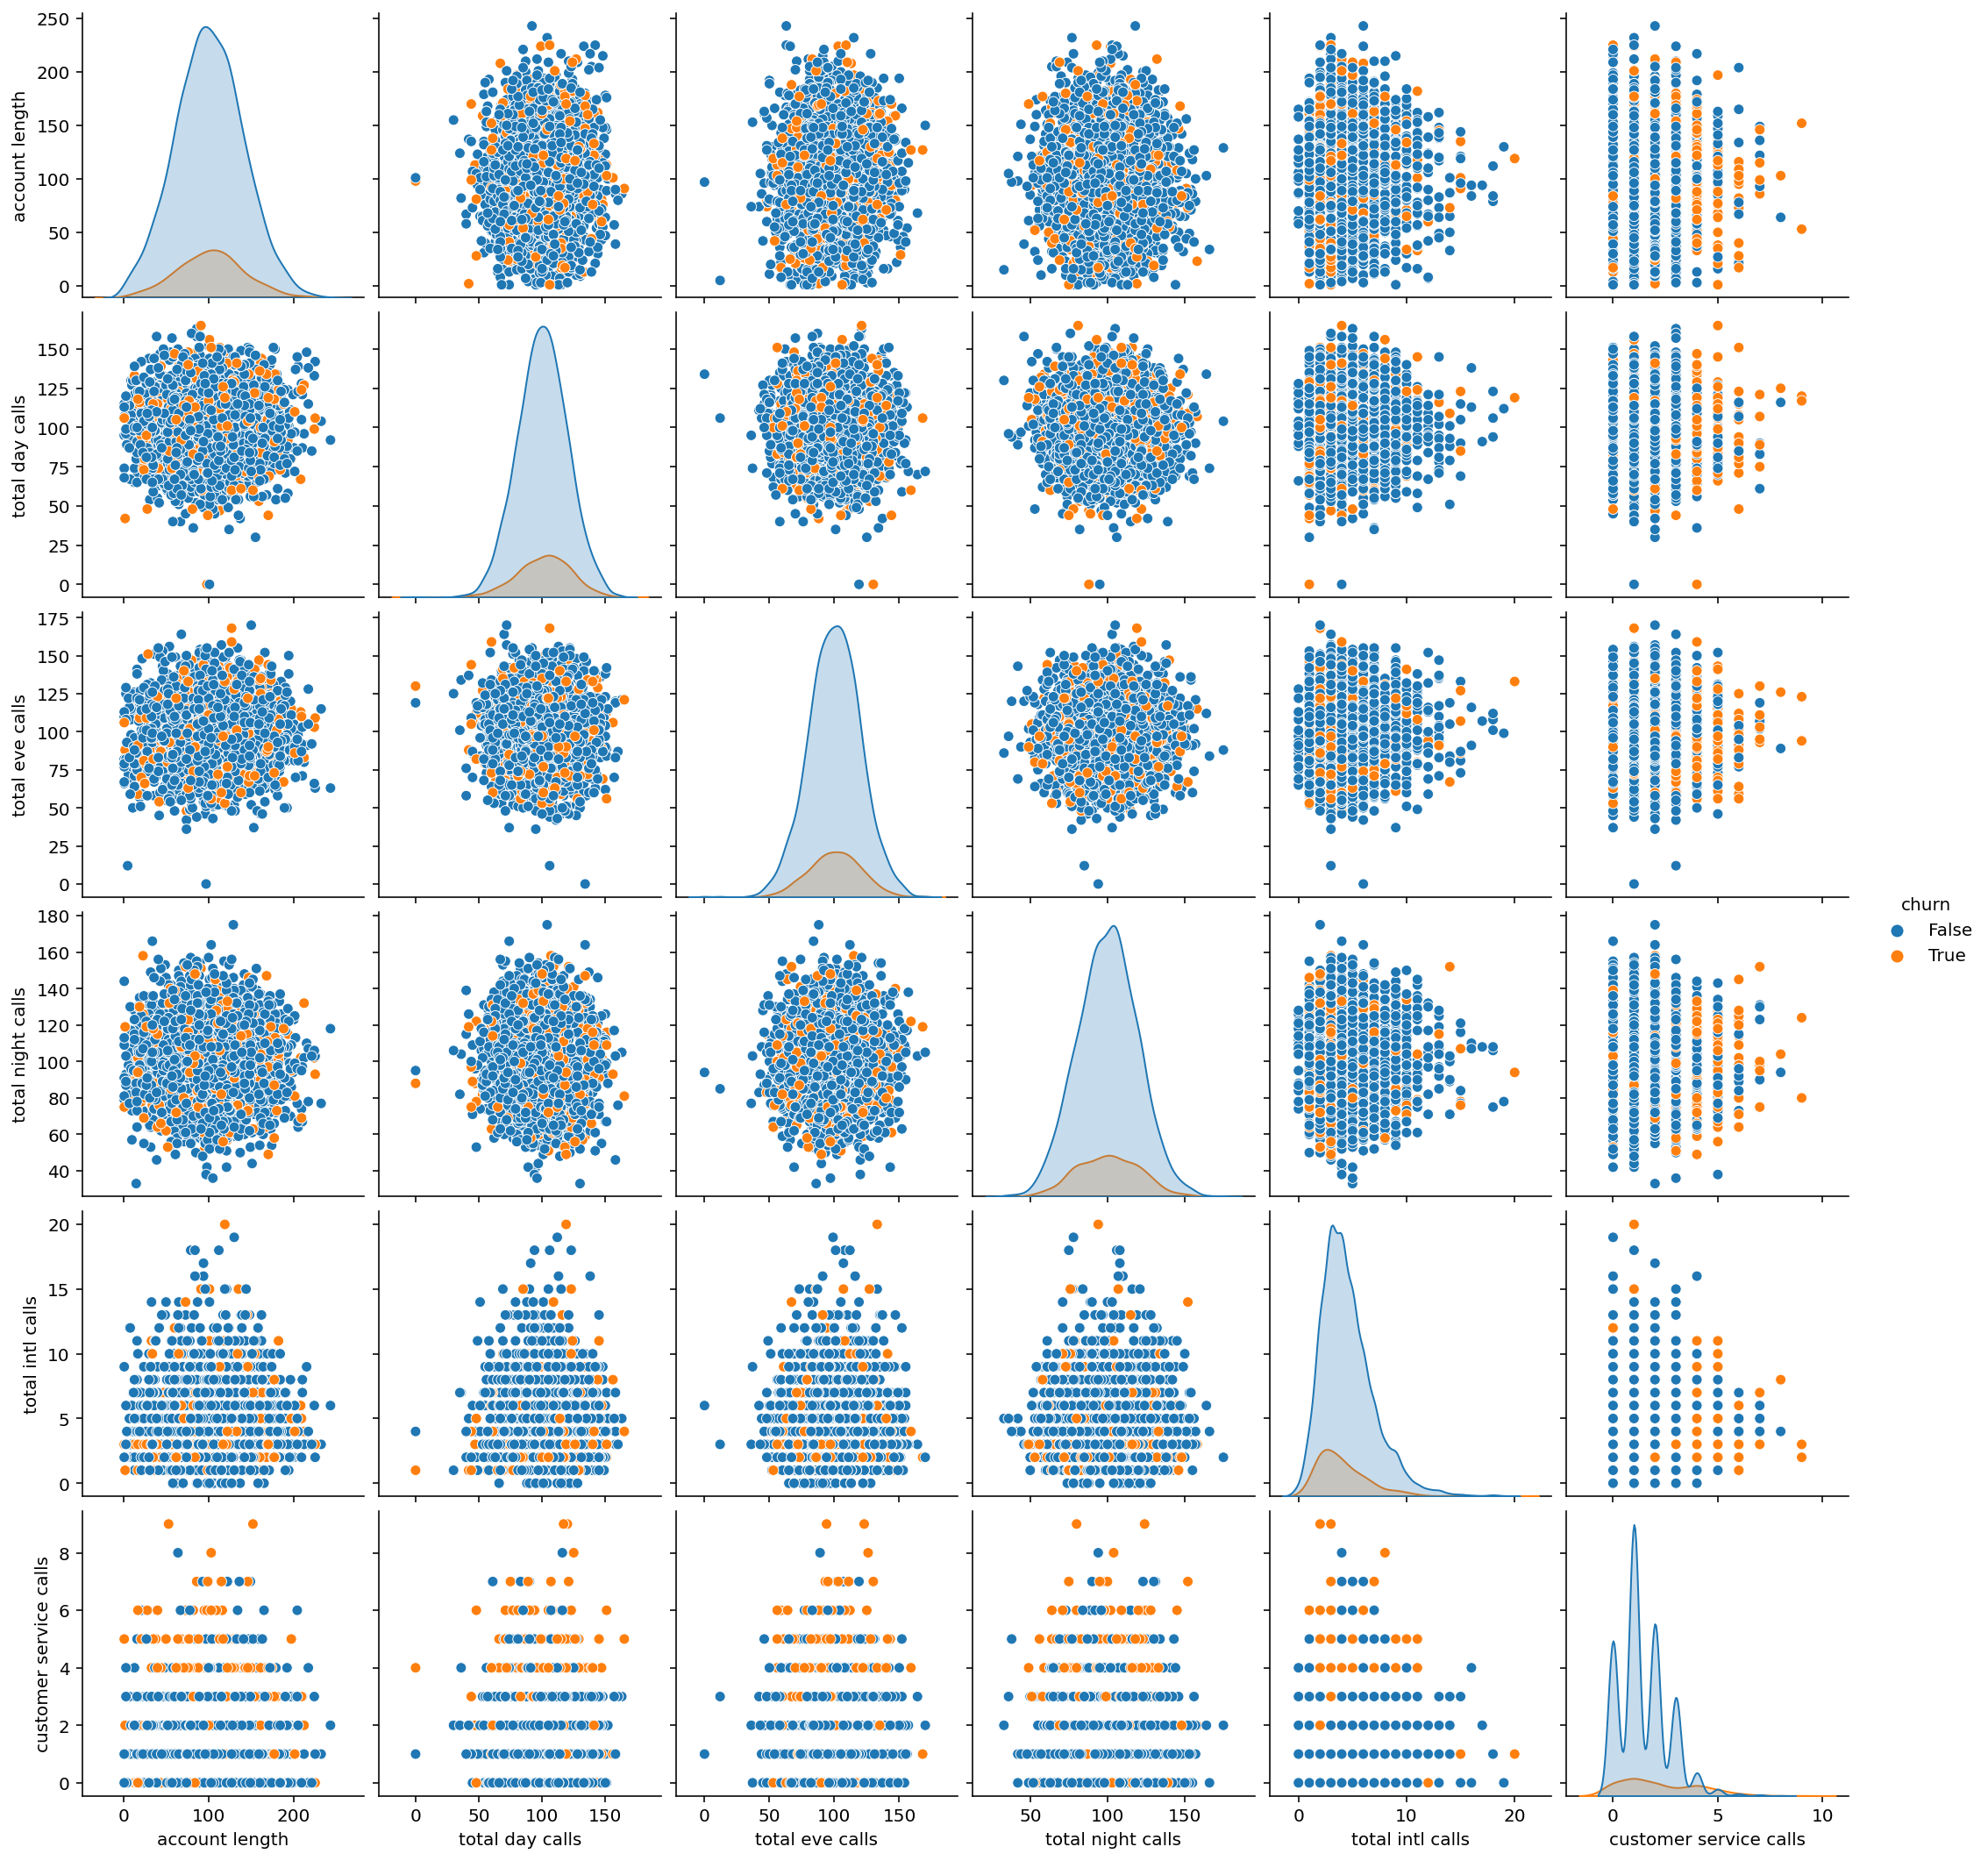

In [190]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

- **Account Length**: 
  - Similar distributions for churned and non-churned customers.
  - Not a strong predictor of churn.

- **Total Day Calls**:
  - No clear distinction between churned and non-churned customers.
  - Likely a weak predictor of churn.

- **Total Eve Calls**:
  - Mixed distribution with no distinct pattern.
  - Suggests weak correlation with churn.

- **Total Night Calls**:
  - Similar distribution across churned and non-churned customers.
  - Likely not a strong indicator of churn.

- **Total Intl Calls**:
  - Even distribution among churned and non-churned customers.
  - Unlikely to be a significant predictor of churn.

- **Customer Service Calls**:
  - Churned customers tend to have made more customer service calls.
  - Stronger predictor of churn compared to other variables.


**Overall Deduction:**

No single feature stands out as a strong predictor of churn.

The relationships between features may need to be considered in combination to effectively predict churn.



In [191]:
# Correlation with churn for continuous features
correlation = df[continuous_cols].corrwith(df['churn']).sort_values(ascending=False)
print(correlation)


customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
dtype: float64


### Correlation Heatmap for Numeric Features

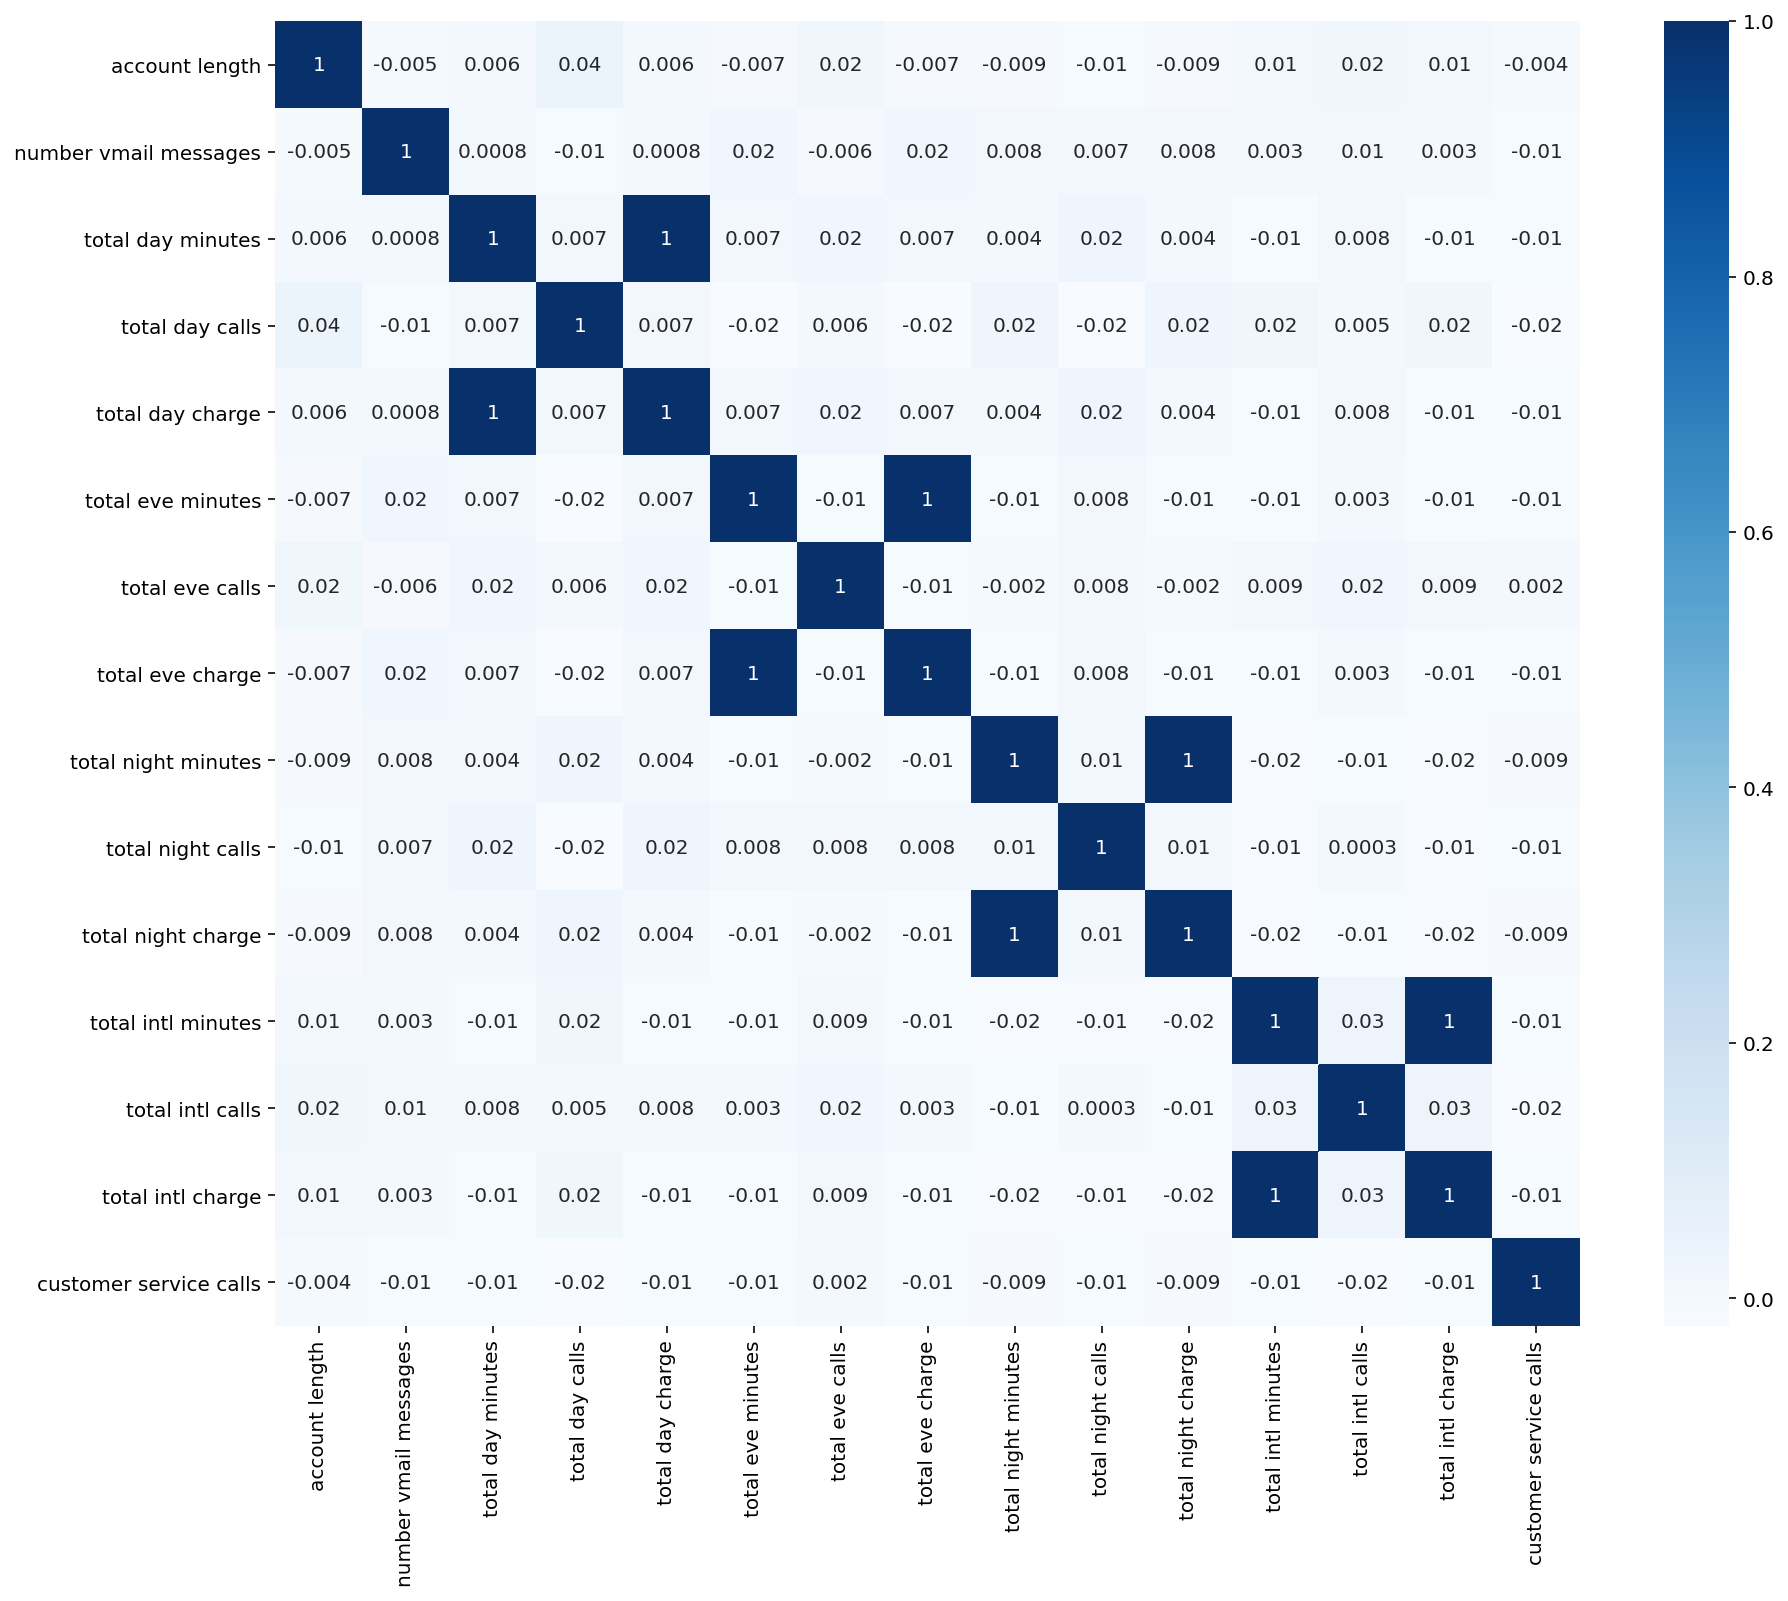

In [192]:
corr_mat = df[continuous_cols].corr()

plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

**Positive Correlations**: Features like customer service calls, total day minutes, and total day charge show a positive correlation with churn, indicating that higher usage in these areas is associated with a higher likelihood of customer churn.

**Negative Correlations**: Features such as number vmail messages and total intl calls show a negative correlation with churn, suggesting that higher usage in these areas might reduce the likelihood of churn.

**Weak or Negligible Correlations**: Several features like total night calls and account length have little to no correlation with churn, indicating minimal influence on the likelihood of a customer churning.

### Outlier Detection
* Dropping outliers past 3 standard deviations. 

In [219]:
def drop_continuous_outliers_iqr(df, measure=1.5):
    """
    Remove outliers from a DataFrame based on the Interquartile Range (IQR) method.

    This function iterates through all numerical columns in the DataFrame, calculates the IQR for each column, 
    and removes rows where values are outside the specified range.

    Parameters:
    df : The input DataFrame from which outliers will be removed.
    measure (float): The multiplier for the IQR to determine outlier thresholds. Default is 1.5.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - measure * IQR
        upper_bound = Q3 + measure * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



### Dropping Highly-Correlated Features
* Dropping features that have a correlation of 0.9 or above. 

In [220]:

#Dropping the highly correlated features
corr_matrix = df.corr().abs()

# columns to drop based on correlation
to_drop = [corr_matrix.columns[j] 
           for i in range(len(corr_matrix.columns)) 
           for j in range(i + 1, len(corr_matrix.columns)) 
           if corr_matrix.iloc[i, j] > 0.9]

# Dropping the columns
trimmed_df = df.drop(columns=to_drop)

print("Dropped columns:", to_drop)
print("Reduced DataFrame shape:", trimmed_df.shape)



Dropped columns: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
Reduced DataFrame shape: (2777, 18)


### Transforming "Churn" Feature's Rows into 0s and 1s

In [195]:
trimmed_df['churn'].value_counts()

False    2479
True      298
Name: churn, dtype: int64

In [196]:
#Confirming the drop
trimmed_df['churn'] = trimmed_df['churn'].map({True: 1, False: 0}).astype('int') 
trimmed_df.head()

,state,account length,total_calls,area code,total_charge,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,303,415,75.56,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,332,415,59.24,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,333,415,62.29,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,OK,75,359,415,52.09,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,AL,118,323,510,67.61,yes,no,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0


### One-Hot Encoding
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [197]:
df_encoded = pd.get_dummies(trimmed_df, columns=['state','area code' ,'international plan', 'voice mail plan'], drop_first=True)


In [198]:
df_encoded.head()

,account length,total_calls,total_charge,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,303,75.56,25,265.1,110,197.4,99,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,332,59.24,26,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,333,62.29,0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,1,0,0,0
4,75,359,52.09,0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,1,0,1,0
5,118,323,67.61,0,223.4,98,220.6,101,203.9,118,...,0,0,0,0,0,0,0,1,1,0


In [199]:
df_encoded.columns

Index(['account length', 'total_calls', 'total_charge',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'area code_415', 'area code

In [200]:
# Preparing the data
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [222]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """
    Evaluates the performance of a machine learning model.

    Parameters:
    - y_true : True class labels.
    - y_pred : Predicted class labels from the model.
    - y_proba : Predicted probabilities from the model.
    - model_name : Name of the model being evaluated.

    Returns:
    - dict: A dictionary containing:
        - 'Model': Name of the model.
        - 'Confusion Matrix': Confusion matrix of the model.
        - 'Classification Report': Detailed classification report including precision, recall, and F1 score.
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    class_report = classification_report(y_true, y_pred, output_dict=True)

    # Prepare results dictionary
    result = {
        'Model': model_name,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }
    
    return result



## Base Model / Model 1

#### Decision Tree without Scaling or SMOTE

In [202]:
print("Model 1: Decision Tree - No Scaling, No SMOTE")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]


Model 1: Decision Tree - No Scaling, No SMOTE


### Model 2: Logistic Regression with Scaling

In [203]:
# We will use Pipeline to streamline and simplify the process of applying a sequence of data preprocessing steps followed by model training and evaluation.

print("Model 2: Logistic Regression - With Scaling, No SMOTE")
pipeline_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]



Model 2: Logistic Regression - With Scaling, No SMOTE


## Model Training With SMOTE

We will use SMOTE (Synthetic Minority Over-sampling Technique) technique  to handle the imbalanced dataset by generating synthetic examples for the minority class(churnners). This will help in  improving the performance of machine learning models .

In [204]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### Model 3: Decision Tree with SMOTE

In [205]:
print("Model 3: Decision Tree - No Scaling, With SMOTE")
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_dt_smote = dt_smote.predict(X_test)
y_proba_dt_smote = dt_smote.predict_proba(X_test)[:, 1]


Model 3: Decision Tree - No Scaling, With SMOTE


### Model 4: Logistic Regression with SMOTE and Scaling

In [206]:
print("Model 4: Logistic Regression - With Scaling, With SMOTE")
pipeline_lr_smote = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])
pipeline_lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = pipeline_lr_smote.predict(X_test)
y_proba_lr_smote = pipeline_lr_smote.predict_proba(X_test)[:, 1]


Model 4: Logistic Regression - With Scaling, With SMOTE


## Feature Reduction with Feature Importances

By selecting the most important features, we reduce the dimensionality of the dataset. This will lead to simpler models that are potentially more generalizable, and also reduces the risk of overfitting.

### Model 5: Decision Tree with Reduced Features and SMOTE

In [207]:
# Feature Selection: Reducing Features Based on Importance

dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced.fit(X_train_smote, y_train_smote)  # Train on SMOTE-resampled data

# Select top 10 features based on model importance
selector = SelectFromModel(dt_reduced, prefit=True, threshold=-np.inf, max_features=10)
X_train_reduced = selector.transform(X_train_smote)
X_test_reduced = selector.transform(X_test)

In [208]:
# Model Training and Evaluation: Using Reduced Features
print("Model 5: Decision Tree - Reduced Features, With SMOTE")
dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced.fit(X_train_reduced, y_train_smote)  # Train on reduced feature training data

# Predict and evaluate on reduced feature test data
y_pred_dt_reduced = dt_reduced.predict(X_test_reduced)
y_proba_dt_reduced = dt_reduced.predict_proba(X_test_reduced)[:, 1]




Model 5: Decision Tree - Reduced Features, With SMOTE


### Model 6: Logistic Regression with Reduced Features and SMOTE

In [209]:
print("Model 6: Logistic Regression - Reduced Features, With SMOTE")
pipeline_lr_reduced = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])
pipeline_lr_reduced.fit(X_train_reduced, y_train_smote)
y_pred_lr_reduced = pipeline_lr_reduced.predict(X_test_reduced)
y_proba_lr_reduced = pipeline_lr_reduced.predict_proba(X_test_reduced)[:, 1]



Model 6: Logistic Regression - Reduced Features, With SMOTE


## Evaluating and Comparing the differnt  Models

In [210]:
# Initializing results list
results = []

# Evaluate each model once and append the results
results.append(evaluate_model(y_test, y_pred_dt, y_proba_dt, "Decision Tree - No Scaling, No SMOTE"))
results.append(evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression - With Scaling, No SMOTE"))
results.append(evaluate_model(y_test, y_pred_dt_smote, y_proba_dt_smote, "Decision Tree - No Scaling, With SMOTE"))
results.append(evaluate_model(y_test, y_pred_lr_smote, y_proba_lr_smote, "Logistic Regression - With Scaling, With SMOTE"))
results.append(evaluate_model(y_test, y_pred_dt_reduced, y_proba_dt_reduced, "Decision Tree - Reduced Features, With SMOTE"))
results.append(evaluate_model(y_test, y_pred_lr_reduced, y_proba_lr_reduced, "Logistic Regression - Reduced Features, With SMOTE"))


In [212]:
for result in results:
    print(f"\n{result['Model']}:")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\nClassification Report:")
    class_report_df = pd.DataFrame(result['Classification Report']).transpose()
    print(class_report_df)
    print("-*-" * 60)


Decision Tree - No Scaling, No SMOTE:
Confusion Matrix:
[[717  28]
 [ 19  70]]

Classification Report:
              precision    recall  f1-score     support
0              0.974185  0.962416  0.968265  745.000000
1              0.714286  0.786517  0.748663   89.000000
accuracy       0.943645  0.943645  0.943645    0.943645
macro avg      0.844235  0.874466  0.858464  834.000000
weighted avg   0.946450  0.943645  0.944830  834.000000
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

Logistic Regression - With Scaling, No SMOTE:
Confusion Matrix:
[[737   8]
 [ 69  20]]

Classification Report:
              precision    recall  f1-score     support
0              0.914392  0.989262  0.950355  745.000000
1              0.714286  0.224719  0.341880   89.000000
accuracy       0.907674  0.907674  0.907674    0.907674
macro avg      0.814339  0.606990  0.646117  834.000000
weighted avg   0.893038  0.907674  0.885422  834.000000
-*--*--*--*--*--*--*-

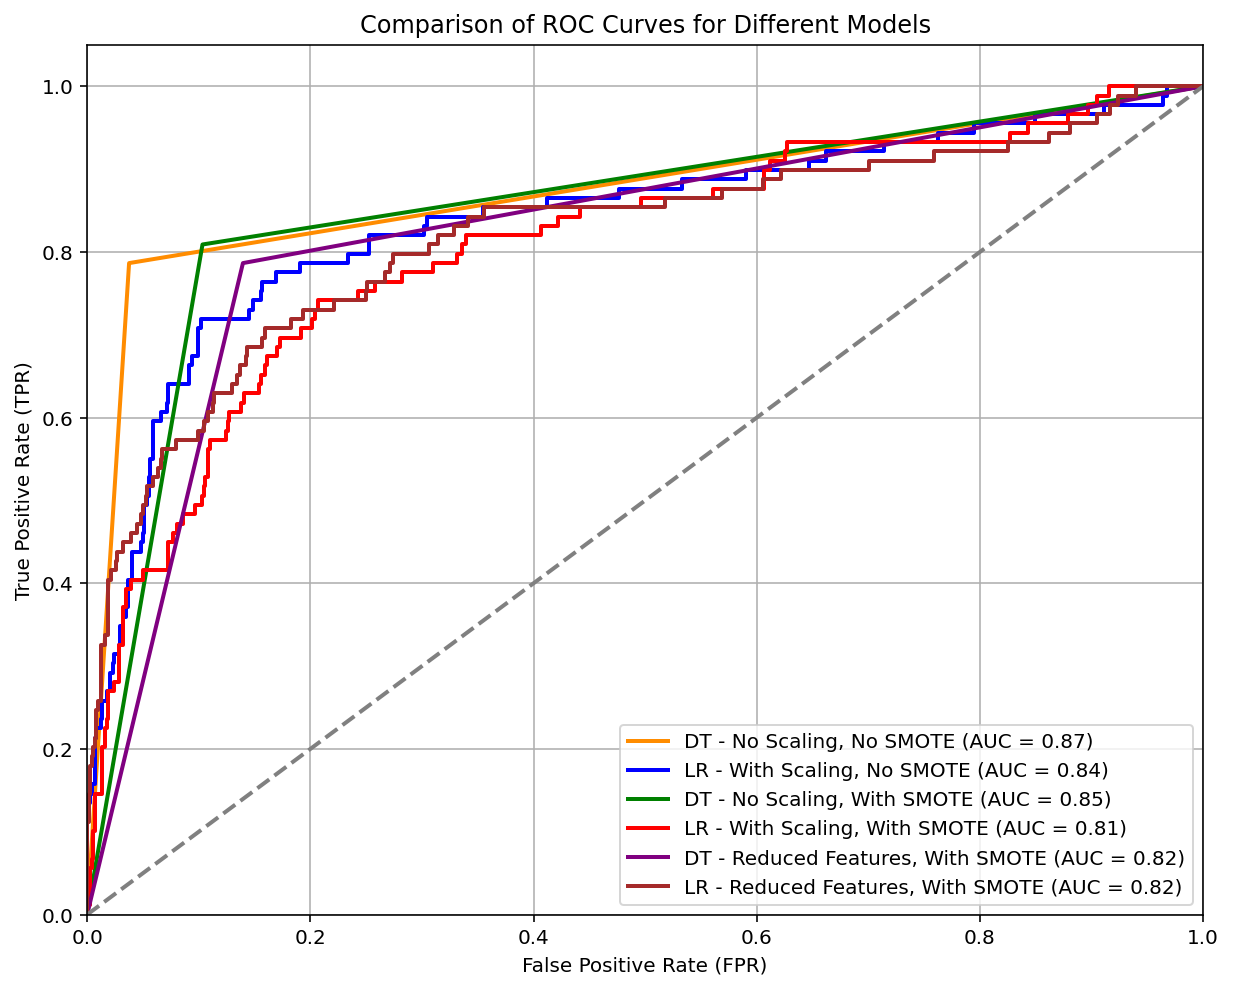

In [224]:
# Initializing the plot
plt.figure(figsize=(10, 8))

# Model 1: Decision Tree - No Scaling, No SMOTE
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'DT - No Scaling, No SMOTE (AUC = {roc_auc_dt:.2f})')

# Model 2: Logistic Regression - With Scaling, No SMOTE
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'LR - With Scaling, No SMOTE (AUC = {roc_auc_lr:.2f})')

# Model 3: Decision Tree - No Scaling, With SMOTE
fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test, y_proba_dt_smote)
roc_auc_dt_smote = auc(fpr_dt_smote, tpr_dt_smote)
plt.plot(fpr_dt_smote, tpr_dt_smote, color='green', lw=2, label=f'DT - No Scaling, With SMOTE (AUC = {roc_auc_dt_smote:.2f})')

# Model 4: Logistic Regression - With Scaling, With SMOTE
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_test, y_proba_lr_smote)
roc_auc_lr_smote = auc(fpr_lr_smote, tpr_lr_smote)
plt.plot(fpr_lr_smote, tpr_lr_smote, color='red', lw=2, label=f'LR - With Scaling, With SMOTE (AUC = {roc_auc_lr_smote:.2f})')

# Model 5: Decision Tree - Reduced Features, With SMOTE
fpr_dt_reduced, tpr_dt_reduced, _ = roc_curve(y_test, y_proba_dt_reduced)
roc_auc_dt_reduced = auc(fpr_dt_reduced, tpr_dt_reduced)
plt.plot(fpr_dt_reduced, tpr_dt_reduced, color='purple', lw=2, label=f'DT - Reduced Features, With SMOTE (AUC = {roc_auc_dt_reduced:.2f})')

# Model 6: Logistic Regression - Reduced Features, With SMOTE
fpr_lr_reduced, tpr_lr_reduced, _ = roc_curve(y_test, y_proba_lr_reduced)
roc_auc_lr_reduced = auc(fpr_lr_reduced, tpr_lr_reduced)
plt.plot(fpr_lr_reduced, tpr_lr_reduced, color='brown', lw=2, label=f'LR - Reduced Features, With SMOTE (AUC = {roc_auc_lr_reduced:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparison of ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.grid()

# Show plot
plt.show()


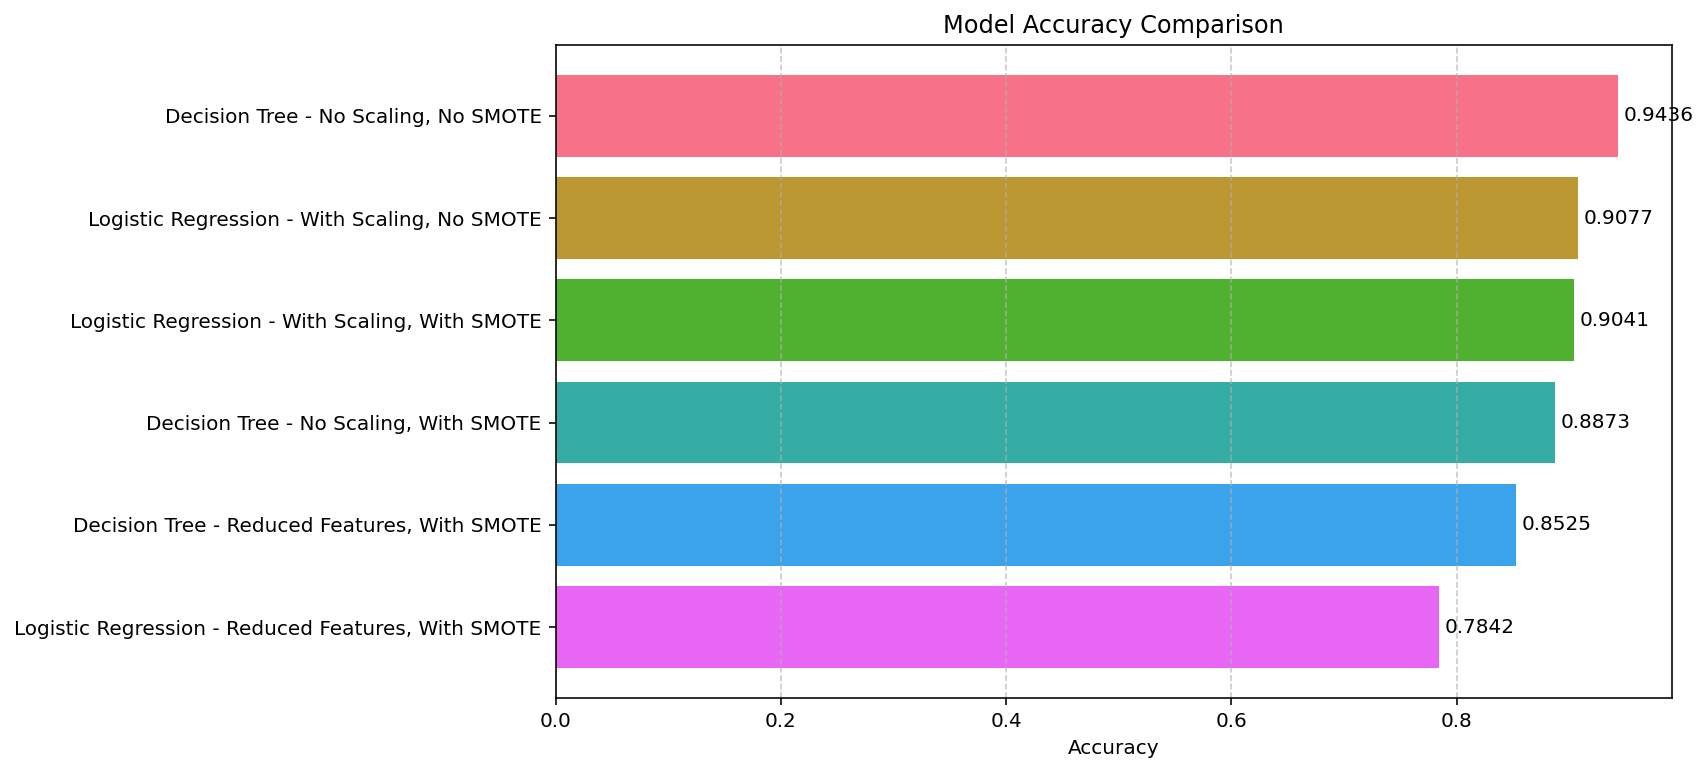

In [228]:
# Sorting results by accuracy in descending order
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Plotting accuracies using a horizontal bar plot with different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model'], results_df['Accuracy'], color=sns.color_palette("husl", len(results_df)))
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding accuracy values next to bars
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.show()

# Summary of the Results

## 1. Decision Tree - No Scaling, No SMOTE
- **Accuracy**: 94.36%
- **Precision**: 71.43%
- **Recall**: 78.65%
- **Analysis**: 
  - This model achieved the highest accuracy with a good balance between precision and recall.
  - It effectively predicts churn without needing any preprocessing.
  - However, it may favor the majority class (non-churners), which can lead to fewer detected churn cases.

## 2. Logistic Regression - With Scaling, No SMOTE
- **Accuracy**: 90.77%
- **Precision**: 71.43%
- **Recall**: 22.47%
- **Analysis**:
  - This model shows high accuracy and excellent precision but suffers from low recall.
  - It misses many potential churners, making it less suitable for identifying at-risk customers.

## 3. Decision Tree - No Scaling, With SMOTE
- **Accuracy**: 88.73%
- **Precision**: 48.32%
- **Recall**: 80.90%
- **Analysis**:
  - Improved recall at the cost of lower precision.
  - This model is better at catching more churners, even if it introduces more false positives.
  - Suitable for broad retention strategies where catching all possible churners is crucial.

## 4. Logistic Regression - With Scaling, With SMOTE
- **Accuracy**: 90.41%
- **Precision**: 57.38%
- **Recall**: 39.33%
- **Analysis**:
  - Offers a balanced performance with decent overall accuracy.
  - This model provides a middle ground between precision and recall.

## 5. Decision Tree - Reduced Features, With SMOTE
- **Accuracy**: 85.25%
- **Precision**: 40.23%
- **Recall**: 78.65%
- **Analysis**:
  - Moderate accuracy with high recall.
  - The reduced feature set simplifies the model but slightly reduces its effectiveness.

## 6. Logistic Regression - Reduced Features, With SMOTE
- **Accuracy**: 78.42%
- **Precision**: 29.41%
- **Recall**: 73.03%
- **Analysis**:
  - This model has the lowest performance, with lower precision and recall.
  - It is less effective for practical use compared to the other models.

## Conclusion and Final Model Selection

**Selected Model**: **Decision Tree - No Scaling, With SMOTE**

### Justification:
- **High Recall**: 
  - The selected model’s recall of 80.90% is crucial for identifying customers at risk of churn, aligning with the primary business goal.
- **Cost of False Positives vs. False Negatives**: 
  - Although precision is lower, the cost of false positives (offering incentives to customers who may not churn) might be lower than the cost of false negatives (missing customers who do churn).
- **Balanced Performance**:
  - The model’s balanced accuracy and F1 score make it an optimal choice.

## Implications for Syriatel

- **High Recall**: 
  - The model effectively identifies a majority of high-risk customers, allowing Syriatel to take preemptive action to retain them.
- **SMOTE Usefulness**: 
  - The application of SMOTE improves the model’s ability to detect churn by oversampling the minority class (churners).
- **Feature Importance**: 
  - The use of all features without reduction yields better predictive performance, implying that every bit of customer information contributes to understanding churn risk.

### Next Steps:
This model can be used to develop targeted retention strategies, such as personalized offers or customer engagement programs, to minimize churn and maximize customer loyalty.
